In [1]:
%pip install csv-to-sqlite
import sqlite3

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

conn = create_connection("db.sqlite")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pip install pandas --upgrade
import pandas as pd

columns = ['transaction_unique_identifier', 'price', 'date_of_transfer', 'postcode', 'property_type', 'new_build_flag', 'tenure_type', 'primary_addressable_object_name',
           'secondary_addressable_object_name', 'street', 'locality', 'town_city', 'district', 'county', 'ppd_category_type', 'record_status', 'db_id']

pp_2018 = pd.read_csv("/content/drive/MyDrive/pp-2018.csv", names = columns)
pp_2019 = pd.read_csv("/content/drive/MyDrive/pp-2019.csv", names = columns)
pp_2020 = pd.read_csv("/content/drive/MyDrive/pp-2020.csv", names = columns)
pp_2021 = pd.read_csv("/content/drive/MyDrive/pp-2021.csv", names = columns)

pp = pd.concat([pp_2018, pp_2019])

pp.to_csv("pp_combined.csv")

del pp_2018
del pp_2019
del pp_2020
del pp_2021
del pp

!csv-to-sqlite -f pp_combined.csv -t full -o db.sqlite

  [####################################]  100%
Written 2034636 rows into 1 tables in 24.121 seconds


In [4]:
geo_cols = ['postcode', 'status', 'usertype', 'easting', 'northing', 'positional_quality_indicator', 'country', 'latitude', 'longitude', 'postcode_no_space',
  'postcode_fixed_width_seven','postcode_fixed_width_eight', 'postcode_area', 'postcode_district', 'postcode_sector', 'outcode', 'incode', 'db_id']

geo = pd.read_csv("/content/drive/MyDrive/open_postcode_geo.csv", names = geo_cols)

geo.head()

geo.to_csv("open_postcode_geo_1.csv")

del geo

!csv-to-sqlite -f open_postcode_geo_1.csv -t full -o db.sqlite

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


  [####################################]  100%
Written 2528847 rows into 1 tables in 30.115 seconds


In [5]:
def select_top(conn, table,  n):
    """
    Query n first rows of the table
    :param conn: the Connection object
    :param table: The table to query
    :param n: Number of rows to query
    """
    cur = conn.cursor()
    cur.execute(f'SELECT * FROM {table} LIMIT {n}')

    rows = cur.fetchall()
    return rows

def head(conn, table, n=5):
  rows = select_top(conn, table, n)
  for r in rows:
      print(r)

head(conn, "pp_combined")



(0, '{B5755FFD-C10C-7D01-E053-6C04A8C036B6}', 750000, '2018-03-20 00:00', 'HP5 2JD', 'T', 'N', 'F', 'CAIRN HOUSE', '1', 'ELGIVA LANE', '', 'CHESHAM', 'BUCKINGHAMSHIRE', 'BUCKINGHAMSHIRE', 'A', 'A', '')
(1, '{75050A84-BC15-9A88-E053-6B04A8C02390}', 720000, '2018-07-26 00:00', 'SL7 1BS', 'D', 'N', 'F', '4A', '', 'CLAREMONT GARDENS', '', 'MARLOW', 'BUCKINGHAMSHIRE', 'BUCKINGHAMSHIRE', 'A', 'A', '')
(2, '{A96E4ACB-DE37-9205-E053-6C04A8C0DA09}', 315000, '2018-09-18 00:00', 'HP5 2FG', 'F', 'N', 'L', 'LIBERTY COURT, 7', '25', 'BELLINGDON ROAD', '', 'CHESHAM', 'BUCKINGHAMSHIRE', 'BUCKINGHAMSHIRE', 'A', 'A', '')
(3, '{726BF13A-6A37-0A46-E053-6C04A8C01D0D}', 545000, '2018-03-22 00:00', 'SL1 8QA', 'D', 'N', 'F', 'LITTLE PLACE', '', 'GREEN LANE', 'BURNHAM', 'SLOUGH', 'BUCKINGHAMSHIRE', 'BUCKINGHAMSHIRE', 'A', 'A', '')
(4, '{B5755FFD-C322-7D01-E053-6C04A8C036B6}', 260000, '2018-09-17 00:00', 'HP5 3EN', 'F', 'N', 'L', 'NASHLEIGH COURT, 188', 'FLAT 11', 'SEVERALLS AVENUE', '', 'CHESHAM', 'BUCKINGHAMS

In [6]:
head(conn, "open_postcode_geo_1")

(0, 'AB1 0AA', 'terminated', 'small', '385386', '801193', 1, 'Scotland', '57.101474', '-2.242851', 'AB10AA', 'AB1 0AA', 'AB1  0AA', 'AB', 'AB1', 'AB1 0', 'AB1', '0AA', '')
(1, 'AB1 0AB', 'terminated', 'small', '385177', '801314', 1, 'Scotland', '57.102554', '-2.246308', 'AB10AB', 'AB1 0AB', 'AB1  0AB', 'AB', 'AB1', 'AB1 0', 'AB1', '0AB', '')
(2, 'AB1 0AD', 'terminated', 'small', '385053', '801092', 1, 'Scotland', '57.100556', '-2.248342', 'AB10AD', 'AB1 0AD', 'AB1  0AD', 'AB', 'AB1', 'AB1 0', 'AB1', '0AD', '')
(3, 'AB1 0AE', 'terminated', 'small', '384600', '799300', 8, 'Scotland', '57.084444', '-2.255708', 'AB10AE', 'AB1 0AE', 'AB1  0AE', 'AB', 'AB1', 'AB1 0', 'AB1', '0AE', '')
(4, 'AB1 0AF', 'terminated', 'large', '384460', '800660', 8, 'Scotland', '57.096656', '-2.258102', 'AB10AF', 'AB1 0AF', 'AB1  0AF', 'AB', 'AB1', 'AB1 0', 'AB1', '0AF', '')


In [7]:
cols = ['price', 'date_of_transfer', 'postcode', 'property_type', 'new_build_flag', 'tenure_type', 'locality',
        'town_city', 'district', 'county', 'country', 'latitude', 'longitude', 'db_id']

def filter_join(latitude, longitude, year, conn, bounds):
  cur = conn.cursor()

  cur.execute(f"""SELECT pp.price as price,
   pp.date_of_transfer as date_of_transfer,
   pp.postcode as postcode,
   pp.property_type as proprty_type,
   pp.new_build_flag as new_build_flag, 
   pp.tenure_type as tenure_type, 
   pp.locality as locality, 
   pp.town_city as town_city, 
   pp.district as district, 
   pp.county as county, 
   geo.country as country, 
   geo.latitude as latitude, 
   geo.longitude as longitude, 
   pp.db_id as db_id
  FROM 
    (SELECT price, date_of_transfer, property_type, new_build_flag, 
     tenure_type, locality, town_city, district, 
     county, db_id,
      postcode FROM pp_combined
    WHERE date_of_transfer >= '{year}-01-01 00:00:00' 
       AND date_of_transfer < '{year + 1}-01-01 00:00:00') pp
    INNER JOIN
    (SELECT 
      longitude, latitude, postcode, country
      FROM open_postcode_geo_1
    WHERE (longitude BETWEEN {longitude + bounds} AND {longitude - bounds})
    AND latitude > {latitude - bounds}
    AND latitude < {latitude + bounds}) geo
    ON
      pp.postcode = geo.postcode""")
  row = cur.fetchall()
  return row


def filter_join_year(year, conn):
  cur = conn.cursor()

  cur.execute(f"""SELECT pp.price as price,
   pp.date_of_transfer as date_of_transfer,
   pp.postcode as postcode,
   pp.property_type as proprty_type,
   pp.new_build_flag as new_build_flag, 
   pp.tenure_type as tenure_type, 
   pp.locality as locality, 
   pp.town_city as town_city, 
   pp.district as district, 
   pp.county as county, 
   geo.country as country, 
   geo.latitude as latitude, 
   geo.longitude as longitude, 
   pp.db_id as db_id
  FROM 
    (SELECT price, date_of_transfer, property_type, new_build_flag, 
     tenure_type, locality, town_city, district, 
     county, db_id,
      postcode FROM pp_combined
    WHERE date_of_transfer >= '{year}-01-01 00:00:00' 
       AND date_of_transfer < '{year + 1}-01-01 00:00:00') pp
    INNER JOIN
    (SELECT 
      longitude, latitude, postcode, country
      FROM open_postcode_geo_1) geo
    ON
      pp.postcode = geo.postcode""")
  row = cur.fetchall()
  return row


# rows = filter_join(51.706731, -0.613550, 2018, conn, 0.1)
rows = filter_join_year(2018, conn)

In [8]:
def rows_to_df(rows, cols):
  return pd.DataFrame(rows, columns = cols)


df = rows_to_df(rows, cols)
df.head()

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure_type,locality,town_city,district,county,country,latitude,longitude,db_id
0,750000,2018-03-20 00:00,HP5 2JD,T,N,F,,CHESHAM,BUCKINGHAMSHIRE,BUCKINGHAMSHIRE,England,51.706731,-0.613550,
1,720000,2018-07-26 00:00,SL7 1BS,D,N,F,,MARLOW,BUCKINGHAMSHIRE,BUCKINGHAMSHIRE,England,51.573109,-0.773382,
2,315000,2018-09-18 00:00,HP5 2FG,F,N,L,,CHESHAM,BUCKINGHAMSHIRE,BUCKINGHAMSHIRE,England,51.708480,-0.612883,
3,545000,2018-03-22 00:00,SL1 8QA,D,N,F,BURNHAM,SLOUGH,BUCKINGHAMSHIRE,BUCKINGHAMSHIRE,England,51.553147,-0.646114,
4,260000,2018-09-17 00:00,HP5 3EN,F,N,L,,CHESHAM,BUCKINGHAMSHIRE,BUCKINGHAMSHIRE,England,51.716244,-0.605153,


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import numpy as np
from scipy.special import softmax
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import dateutil.relativedelta

In [10]:
%pip install pandas fiona shapely pyproj rtree
%pip install geopandas
import geopandas as gpd
from geopandas.tools import sjoin

     |████████████████████████████████| 15.4 MB 5.9 MB/s 
     |████████████████████████████████| 6.3 MB 37.3 MB/s 
     |████████████████████████████████| 994 kB 53.1 MB/s 
     |████████████████████████████████| 1.0 MB 8.1 MB/s 


In [11]:
%pip install osmnx
%pip install osmx
import osmnx as ox
%pip install mlai
%pip uninstall --yes matplotlib
%pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

     |████████████████████████████████| 95 kB 3.8 MB/s 
     |████████████████████████████████| 11.2 MB 23.6 MB/s 
     |████████████████████████████████| 15.7 MB 48.4 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
google-colab

     |████████████████████████████████| 531 kB 5.2 MB/s 
  Created wheel for pycapnp: filename=pycapnp-0.6.4-cp37-cp37m-linux_x86_64.whl size=3104472 sha256=0ba7b7ea632c00f469dc34dcd965b91f6b37ed034514caba38a1140ba5b70b33
  Stored in directory: /root/.cache/pip/wheels/34/33/8f/0ef9b9a7437256e965e38a5dc39cfb562a0ac1f3fa94df816e
Successfully built pycapnp
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 56 kB 6.3 MB/s 
Found existing installation: matplotlib 3.5.0
Uninstalling matplotlib-3.5.0:
  Successfully uninstalled matplotlib-3.5.0
     |████████████████████████████████| 13.1 MB 6.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is 

In [12]:
def get_poi(place_name, latitude, longitude, diff_lat, diff_long):

    box_width = diff_lat
    box_height = diff_long
    north = latitude + box_height/2
    south = latitude - box_width/2
    west = longitude - box_width/2
    east = longitude + box_width/2
    tags = {"amenity": True, 
        "buildings": True, 
        "historic": True, 
        "leisure": True, 
        "shop": True, 
        "tourism": True}
    pois = ox.geometries_from_bbox(north, south, east, west, tags)

    graph = ox.graph_from_bbox(north, south, east, west)
    nodes, edges = ox.graph_to_gdfs(graph)
    area = ox.geocode_to_gdf(place_name)

    fig, ax = plt.subplots(figsize=plot.big_figsize)

    # Plot the footprint
    area.plot(ax=ax, facecolor="white")

    # Plot street edges
    edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

    ax.set_xlim([west, east])
    ax.set_ylim([south, north])
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

    # Plot all POIs 
    pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)
    plt.tight_layout()

In [59]:
def one_hot(df, col_prefix, col):
  one_hot = pd.get_dummies(df[col])
  df = df.drop(col, axis = 1)
  columns = [f"{col_prefix}_{i}" for i in one_hot.columns]
  one_hot.columns = columns
  df = df.join(one_hot)
  return df

def clean(df):
  df = one_hot(df, 'pt', 'property_type')
  return df
  
def scale_and_reduce(df, cols):
  df_1 = df[cols]
  scaled = preprocessing.scale(df_1)
  df_1_s = pd.DataFrame(scaled, columns = cols)
  df = df.drop(cols, axis = 1)
  return df.join(df_1_s)

def bin_price(df):
  y = np.array(df['price'])
  y_1 = np.sort(y)
  buckets = [np.percentile(y_1, i) for i in range(0, 100, 10)]
  y = np.digitize(y,buckets)
  df['price'] = y
  return df

def get_lat_and_long_box(df):
  lat_min, lat_max = min(df['latitude']), max(df['latitude'])
  lon_min, lon_max = min(df['longitude']), max(df['longitude'])
  return float(lat_max), float(lat_min), float(lon_max), float(lon_min)  


def get_number_of_houses_sold_before(df):
    def get_number(row, df = df):
      area, date = row['postcode'], row['date_of_transfer']
      d = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M")
      d2 = d - dateutil.relativedelta.relativedelta(months=1)
      d1, d2 = str(d), str(d2)
      df = df[df['postcode'] == area]
      total = len(df)
      number_sold_before = df[(df['date_of_transfer'] < d1) & (df['date_of_transfer'] > d2)]
      sold_before = len(number_sold_before)
      average_price = np.mean(df['price'])
      return sold_before, total, average_price
    df[['sold_before', 'sold_total', 'average_price_of_area']] = pd.DataFrame(df.apply(get_number, axis = 1).tolist())
    df.fillna(0)
    return df

required_cols = ['price', 'date_of_transfer', 'postcode', 'latitude', 'longitude', 'property_type']
train_cols = ['latitude', 'longitude', 'pt_D',	'pt_F',	'pt_O',	'pt_S', 'pt_T']
additional_train_cols = ['sold_before', 'sold_total','average_price_of_area']
price_bin = [np.percentile(np.sort(np.array(df['price'])), i) for i in range(0, 100, 10)]

tags = {"amenity": True, 
        "historic": True, 
        "leisure": True, 
        "shop": True, 
        "tourism": True,
        "office" : True,
        "railway" : True,
        "public transport" : True}
keys = list(tags.keys())
train_cols += additional_train_cols + keys
tag_list = required_cols + keys
names = df.town_city.unique().tolist()

In [14]:
def get_map(place_name, df, tags, price_bin):
  df2 = df.loc[df.town_city==place_name].reset_index(drop=True)
  df2['price'] = np.digitize(df2['price'], price_bin)

  north, south, east, west = get_lat_and_long_box(df)
  latitude, longitude  = (north - south)/2, (east - west)/2 

  pois = ox.geometries_from_bbox(north, south, east, west, tags)

  graph = ox.graph_from_bbox(north, south, east, west)
  nodes, edges = ox.graph_to_gdfs(graph)
  area = ox.geocode_to_gdf(place_name)

  fig, ax = plt.subplots(figsize=plot.big_figsize)

  # Plot the footprint
  area.plot(ax=ax, facecolor="white")

  # Plot street edges
  edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

  ax.set_xlim([west, east])
  ax.set_ylim([south, north])
  ax.set_xlabel("longitude")
  ax.set_ylabel("latitude")

  # Plot all POIs 
  pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)

  colors = cm.rainbow(np.linspace(0, 1, 10))
  for price_bucket in range(1,11):
    df_1 = df2[df2['price'] == price_bucket]
    df_1 = gpd.GeoDataFrame(df_1, geometry=gpd.points_from_xy(df_1['longitude'], df_1['latitude']))
    df_1.plot(ax=ax, color=colors[price_bucket - 1], alpha=1, markersize=75)

  plt.tight_layout()

# tags = {"buildings": True,
#           "leisure": True, 
#           "shop": True}
# place_name = town_city[4]
# get_map(place_name, df, tags, price_bin)

In [15]:
def count_nearby_pois(latitude, longitude, key, bounds, pois):
  if key not in pois.columns:
    return 0
  pois = pois[pois[key].notnull()]
  pois = pois[(pois['longitude'] < float(longitude) + bounds) & (pois['longitude'] > float(longitude) - bounds)]
  pois = pois[(pois['latitude'] < float(latitude) + bounds) & (pois['latitude'] > float(latitude) - bounds)]
  return len(pois)

In [16]:
def get_pois(place_name, df, tags, tag_list):
  df = df.loc[df.town_city==place_name].reset_index(drop=True)
  north, south, east, west = get_lat_and_long_box(df)
  latitude, longitude  = (north - south)/2, (east - west)/2 
  pois = ox.geometries_from_bbox(north, south, east, west, tags)
  pois = pois.xs('node')
  pois[['longitude', 'latitude']] = pois.apply(lambda row : row.geometry.representative_point().coords[:][0], axis = 1).tolist()

  for key in tags:
    df[key] = df.apply(lambda row : count_nearby_pois(row['latitude'], row['longitude'], key, 0.02, pois), axis = 1)
  return df[tag_list]

In [18]:
# df1 = df1[required_cols].reset_index(drop = True)

pois_func = lambda name : get_pois(name, df, tags, tag_list)
df_pois = [pois_func(names[i]) for i in range(20)] 
df2 = pd.concat(df_pois).reset_index(drop=True)
df2 = get_number_of_houses_sold_before(df2)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/

In [63]:
df2 = get_number_of_houses_sold_before(df2)
df2 = clean(df2)

In [66]:
inverse_keys = [f"inv_{key}" for key in keys]
for i_key, key in zip(inverse_keys, keys):
  df2[i_key] = 1/(1 + df2[key])

sold_keys = ['sold_before', 'sold_total']
inverse_sold_keys = [f"inv_{key}" for key in sold_keys]
for i_key, key in zip(inverse_sold_keys, sold_keys):
  df2[i_key] = 1/(1 + df2[key])



date_of_transfer


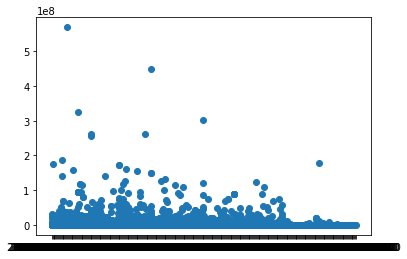

amenity


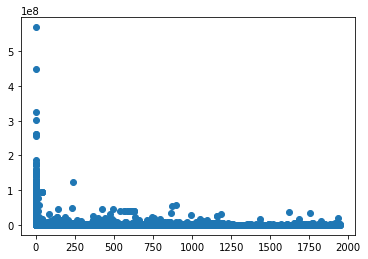

historic


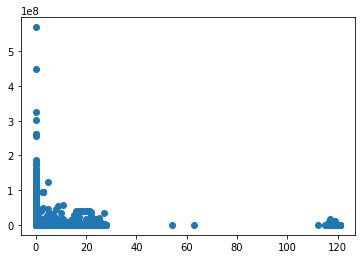

leisure


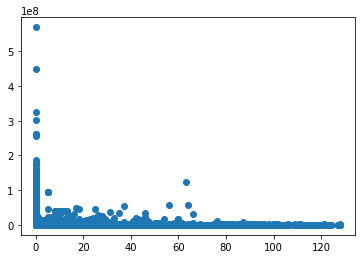

shop


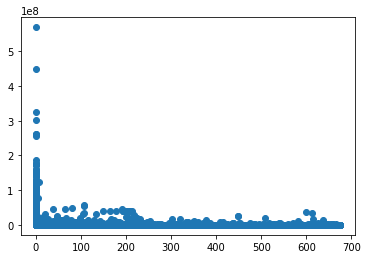

tourism


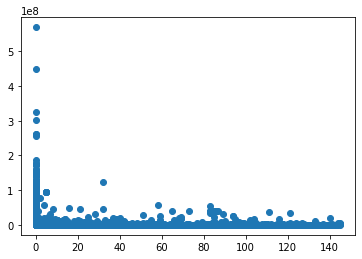

office


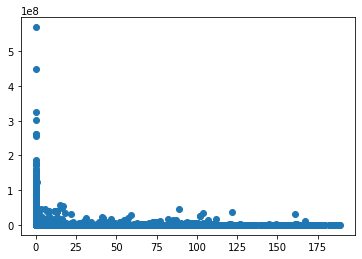

railway


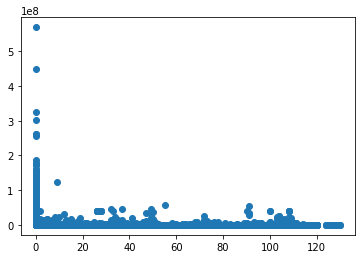

public transport


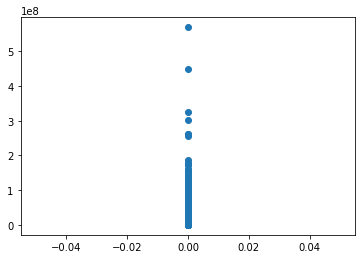

sold_before


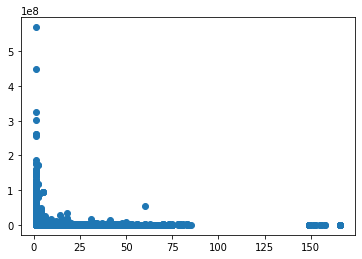

sold_total


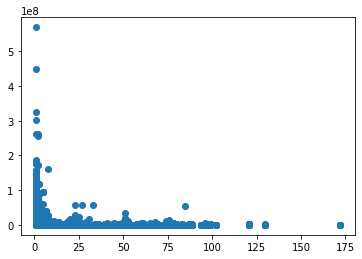

pt_D


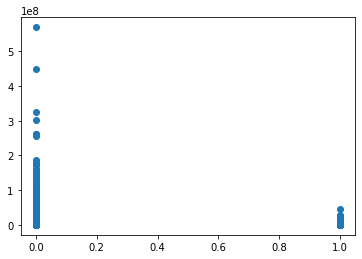

pt_F


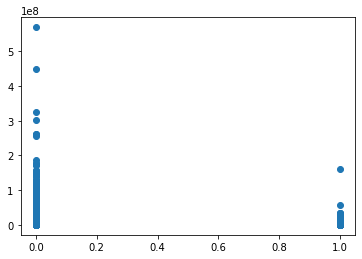

pt_O


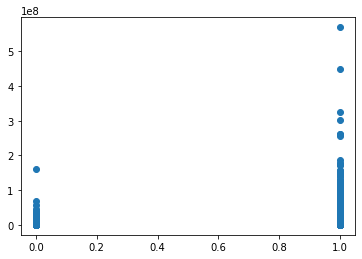

pt_S


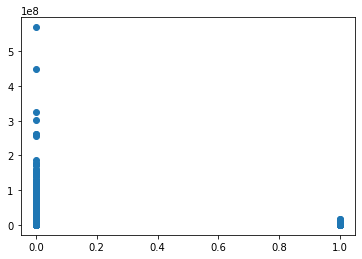

pt_T


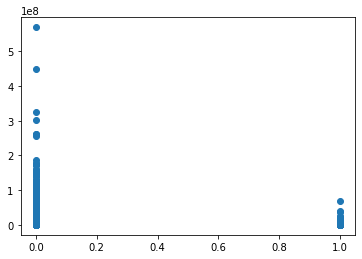

average_price_of_area


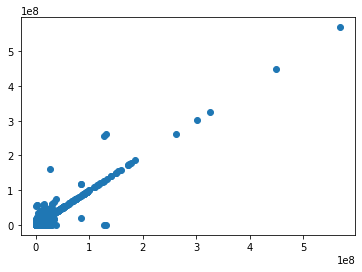

inv_amenity


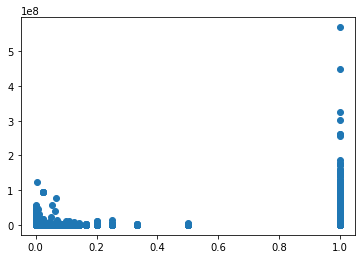

inv_historic


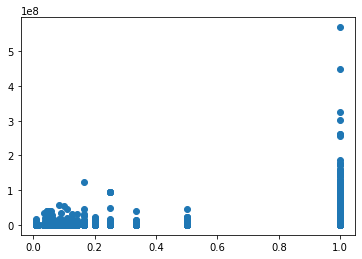

inv_leisure


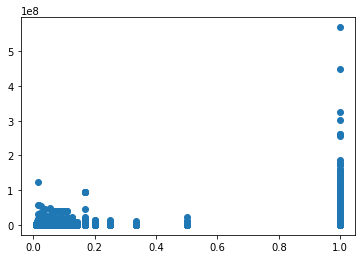

inv_shop


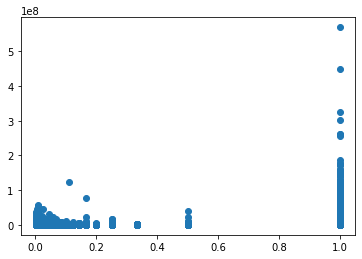

inv_tourism


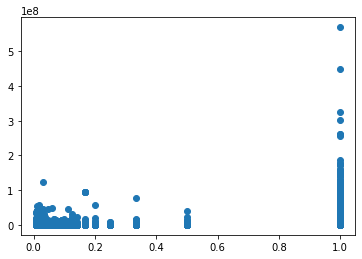

inv_office


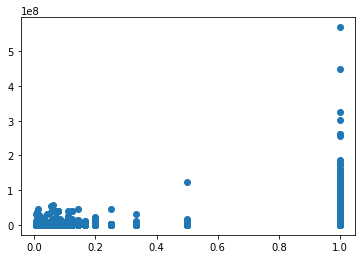

inv_railway


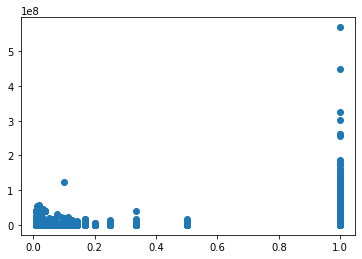

inv_public transport


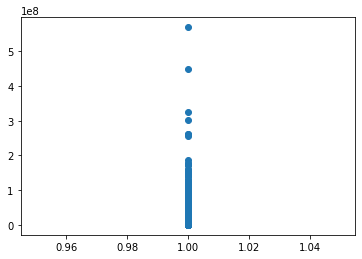

inv_sold_before


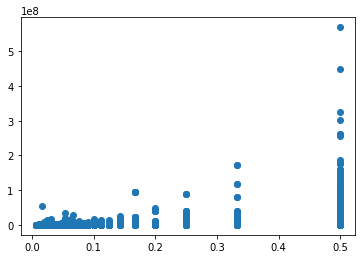

inv_sold_total


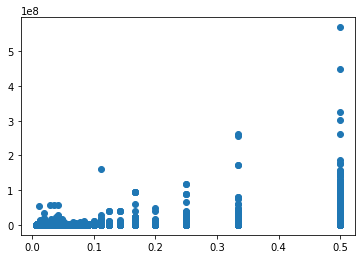

In [67]:
for column in df2.columns:
  if column in ['price', 'latitude', 'longitude', 'postcode']:
    continue
  print(column)
  plt.figure()
  plt.scatter(df2[column], df2['price'])
  plt.show()

In [69]:
train_cols = ['pt_D',	'pt_F',	'pt_O',	'pt_S', 'pt_T']
poi_tags = keys + inverse_keys
sold_tags = sold_keys + inverse_sold_keys
features = train_cols + poi_tags + sold_tags
x = df2[features]
y = df2['price']

model = LinearRegression()

model.fit(x, y)

r = permutation_importance(model, x, y, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

pt_O    0.027 +/- 0.001
inv_amenity0.023 +/- 0.001
pt_F    0.017 +/- 0.001
pt_T    0.005 +/- 0.000
inv_sold_total0.003 +/- 0.000
pt_S    0.003 +/- 0.000
inv_sold_before0.002 +/- 0.000
inv_shop0.001 +/- 0.000
tourism 0.001 +/- 0.000
inv_leisure0.001 +/- 0.000
pt_D    0.000 +/- 0.000
amenity 0.000 +/- 0.000
sold_before0.000 +/- 0.000
shop    0.000 +/- 0.000
office  0.000 +/- 0.000
inv_office0.000 +/- 0.000
inv_historic0.000 +/- 0.000
sold_total0.000 +/- 0.000


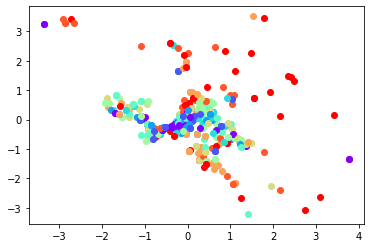

In [70]:
df1 = df.loc[df.town_city==names[0]].reset_index(drop=True)
train_cols += additional_train_cols
df1 = df1[required_cols].reset_index(drop = True)

df1 = scale_and_reduce(df1, ['latitude', 'longitude'])
df1 = bin_price(df1)

colors = cm.rainbow(np.linspace(0, 1, 10))
for index, row in df1.iterrows():
    plt.scatter(row['latitude'], row['longitude'], color = colors[int(row['price'])-1])

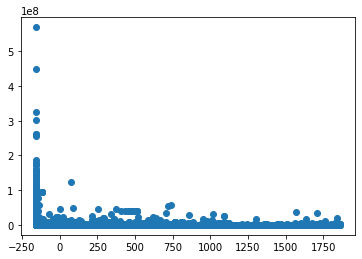

In [71]:
pca = PCA(n_components=1)
x = df2[features]
y = df2['price']
df4 = pd.DataFrame(pca.fit_transform(x))
df4 = df4.join(y)

plt.scatter(df4[0], y)

KeyboardInterrupt: ignored

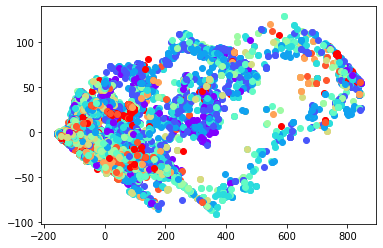

In [72]:
# df2 = scale_and_reduce(df1, ['latitude', 'longitude'] + additional_train_cols)
df2 = bin_price(df2)
pca = PCA(n_components=2)
x = df2[features]
y = df2['price']
df4 = pd.DataFrame(pca.fit_transform(x))
df4 = df4.join(y)

colors = cm.rainbow(np.linspace(0, 1, 10))
for index, row in df4.iterrows():
    plt.scatter(row[0], row[1], color = colors[int(row['price'])-1])


In [1]:
#df2 = bin_price(df1)

pca = PCA(n_components=3)
x = df2[features]
y = df2['price']
df4 = pd.DataFrame(pca.fit_transform(x))
df4 = df4.join(y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for _, row in df4.iterrows():
    ax.scatter(row[0], row[1], row[2], color = colors[int(row['price'])-1])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


NameError: ignored